Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Link for dataset: https://drive.google.com/file/d/17KYH_Z_sBaay_gaw6mZfOx_E--RLc9zV/view?usp=sharing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error




In [2]:
# Load the dataset
file_path = "Walmart.csv"
df = pd.read_csv(file_path)

In [3]:
# Convert the Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [4]:
# Extracting year and month for trend analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [5]:
# 1(a): Impact of Unemployment on Weekly Sales
store_unemployment_sales = df.groupby("Store")[["Weekly_Sales", "Unemployment"]].corr().iloc[0::2, -1].reset_index()
store_unemployment_sales.columns = ["Store", "Drop", "Correlation_Unemployment_Sales"]
store_unemployment_sales = store_unemployment_sales.drop(columns=["Drop"])
most_affected_stores = store_unemployment_sales.nsmallest(5, "Correlation_Unemployment_Sales")
print("Stores most affected by unemployment:\n", most_affected_stores)


Stores most affected by unemployment:
     Store  Correlation_Unemployment_Sales
37     38                       -0.785290
43     44                       -0.780076
38     39                       -0.384681
41     42                       -0.356355
40     41                       -0.350630


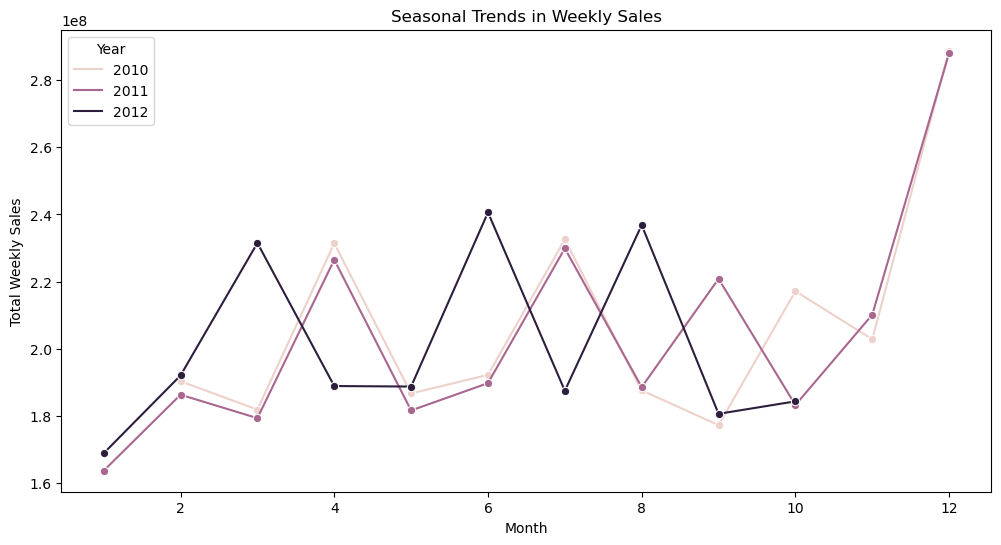

In [6]:
# 1(b): Seasonal Trend in Sales
monthly_sales = df.groupby(["Year", "Month"])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Weekly_Sales", hue="Year", marker="o")
plt.title("Seasonal Trends in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Total Weekly Sales")
plt.legend(title="Year")
plt.show()

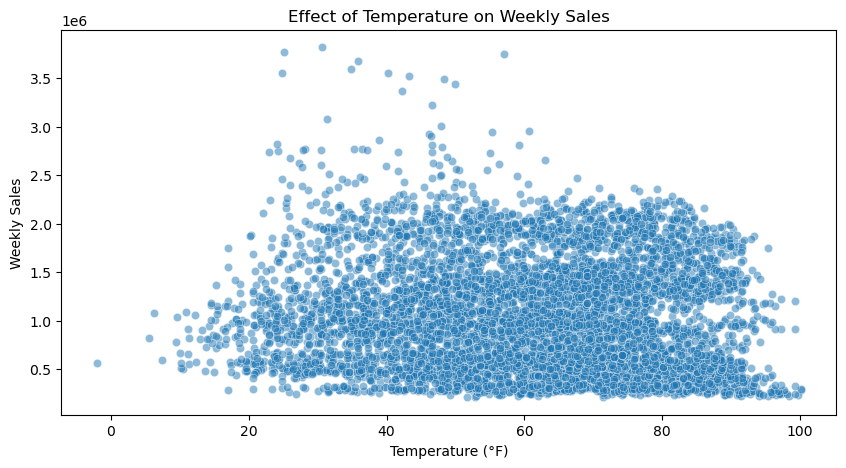

In [7]:
# 1(c): Effect of Temperature on Weekly Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales", alpha=0.5)
plt.title("Effect of Temperature on Weekly Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.show()

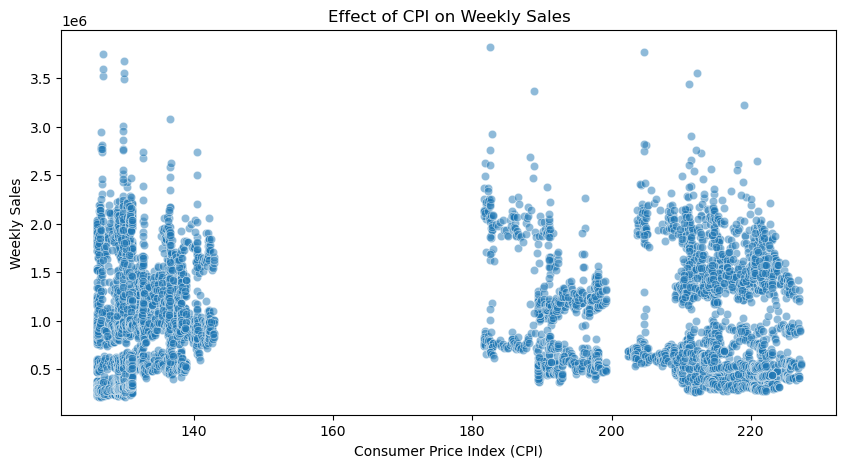

In [8]:
# 1(d): Impact of Consumer Price Index (CPI) on Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="CPI", y="Weekly_Sales", alpha=0.5)
plt.title("Effect of CPI on Weekly Sales")
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("Weekly Sales")
plt.show()


In [9]:
# 1(e) & 1(f): Top and Worst Performing Stores
store_sales = df.groupby("Store")["Weekly_Sales"].sum().reset_index()
top_stores = store_sales.nlargest(5, "Weekly_Sales")
worst_store = store_sales.nsmallest(1, "Weekly_Sales")
print("Top Performing Stores:\n", top_stores)
print("Worst Performing Store:\n", worst_store)

Top Performing Stores:
     Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
Worst Performing Store:
     Store  Weekly_Sales
32     33   37160221.96


H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


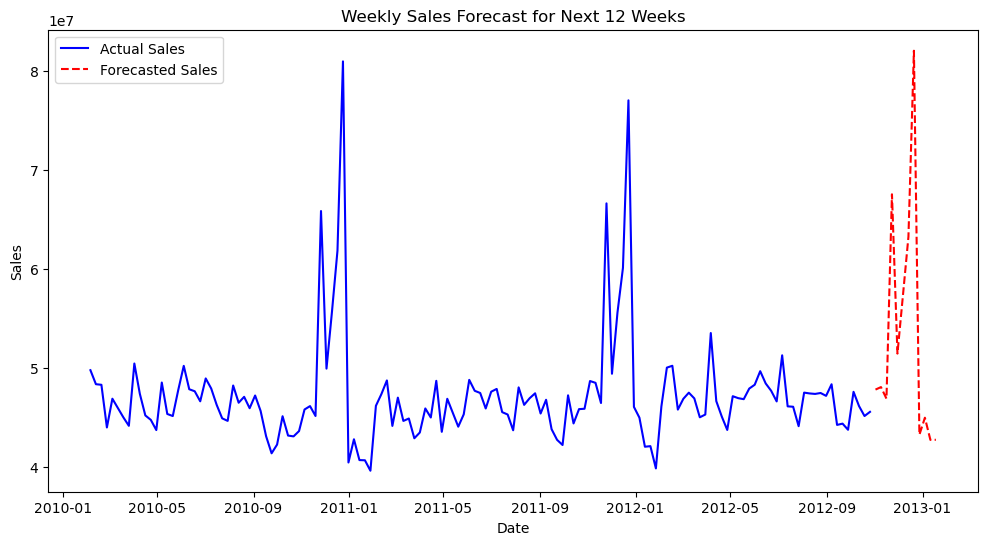

In [10]:
# 2: Forecasting Sales for Next 12 Weeks for All Stores
weekly_sales_data = df.groupby("Date")["Weekly_Sales"].sum()
model = ExponentialSmoothing(weekly_sales_data, trend="add", seasonal="add", seasonal_periods=52)
fitted_model = model.fit()
forecast = fitted_model.forecast(12)
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_data, label="Actual Sales", color="blue")
plt.plot(forecast, label="Forecasted Sales", color="red", linestyle="dashed")
plt.title("Weekly Sales Forecast for Next 12 Weeks")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


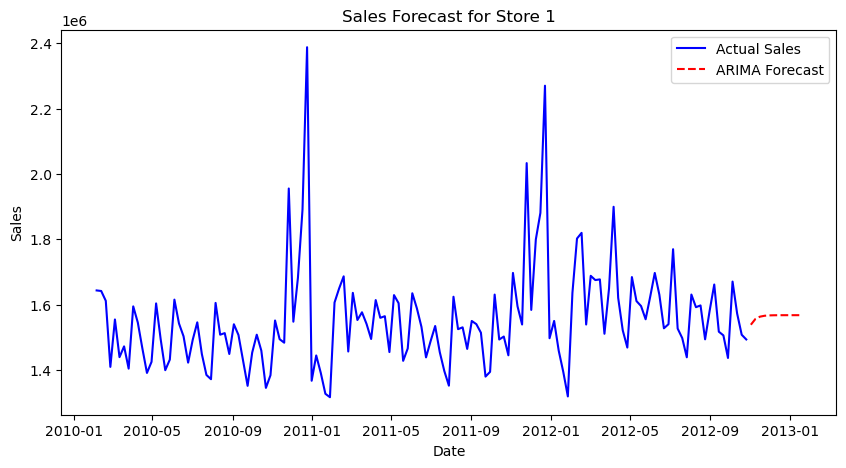

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


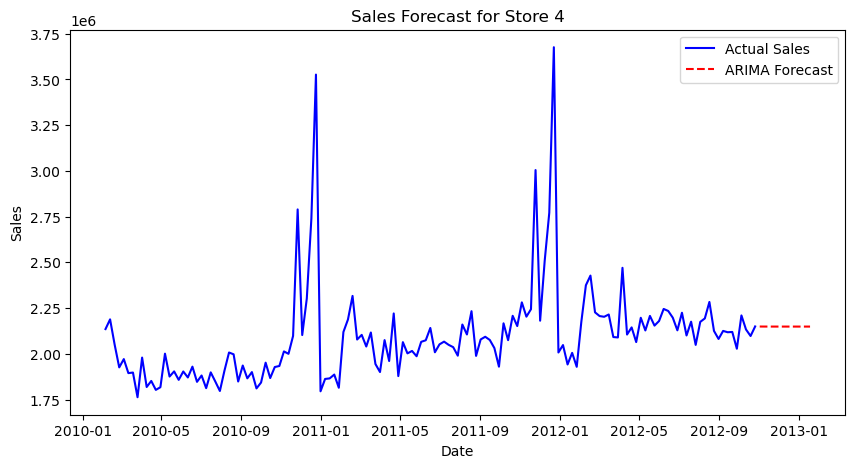

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


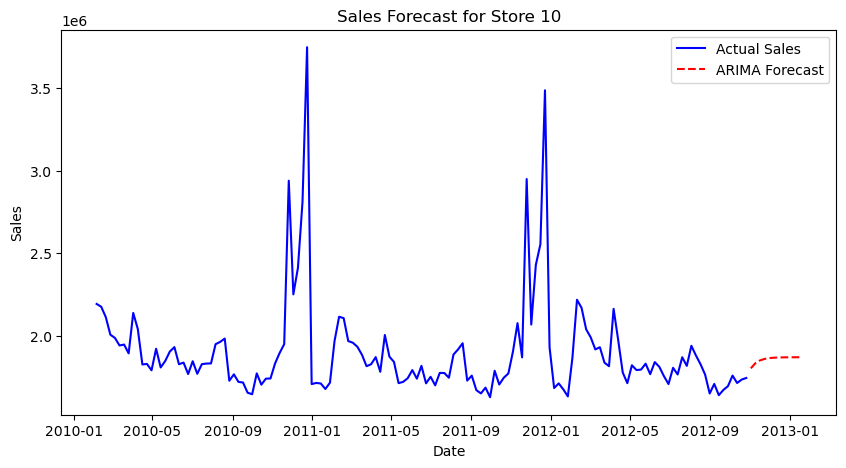

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


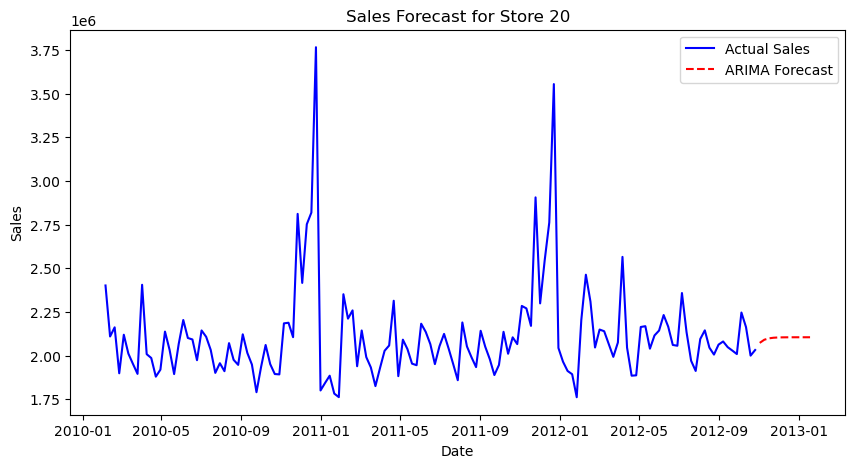

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

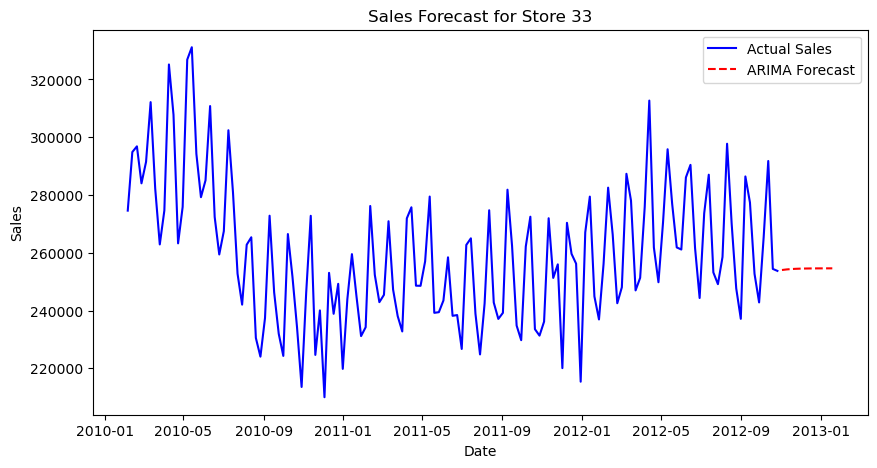

Forecast for Store 1:
2012-11-02    1.538713e+06
2012-11-09    1.556450e+06
2012-11-16    1.563433e+06
2012-11-23    1.566182e+06
2012-11-30    1.567265e+06
2012-12-07    1.567691e+06
2012-12-14    1.567859e+06
2012-12-21    1.567925e+06
2012-12-28    1.567951e+06
2013-01-04    1.567961e+06
2013-01-11    1.567965e+06
2013-01-18    1.567966e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64
Forecast for Store 4:
2012-11-02    2.149109e+06
2012-11-09    2.148926e+06
2012-11-16    2.148857e+06
2012-11-23    2.148832e+06
2012-11-30    2.148822e+06
2012-12-07    2.148818e+06
2012-12-14    2.148817e+06
2012-12-21    2.148816e+06
2012-12-28    2.148816e+06
2013-01-04    2.148816e+06
2013-01-11    2.148816e+06
2013-01-18    2.148816e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64
Forecast for Store 10:
2012-11-02    1.802892e+06
2012-11-09    1.834178e+06
2012-11-16    1.850898e+06
2012-11-23    1.859833e+06
2012-11-30    1.864608e+06
2012-12-07    1.867159e+06
2012-12-14    1.868523e

In [11]:
# 2: Forecasting for 5 Selected Stores using ARIMA/SARIMA
selected_stores = [1, 4, 10, 20, 33]
forecast_results = {}

for store in selected_stores:
    store_sales_data = df[df['Store'] == store].groupby("Date")["Weekly_Sales"].sum()
    
    # Fit ARIMA Model
    model_arima = ARIMA(store_sales_data, order=(1,1,1))
    fitted_arima = model_arima.fit()
    forecast_arima = fitted_arima.forecast(12)
    
    forecast_results[store] = forecast_arima
    
    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(store_sales_data, label="Actual Sales", color="blue")
    plt.plot(forecast_arima, label="ARIMA Forecast", color="red", linestyle="dashed")
    plt.title(f"Sales Forecast for Store {store}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

# Display forecast results
for store, forecast in forecast_results.items():
    print(f"Forecast for Store {store}:")
    print(forecast)


H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

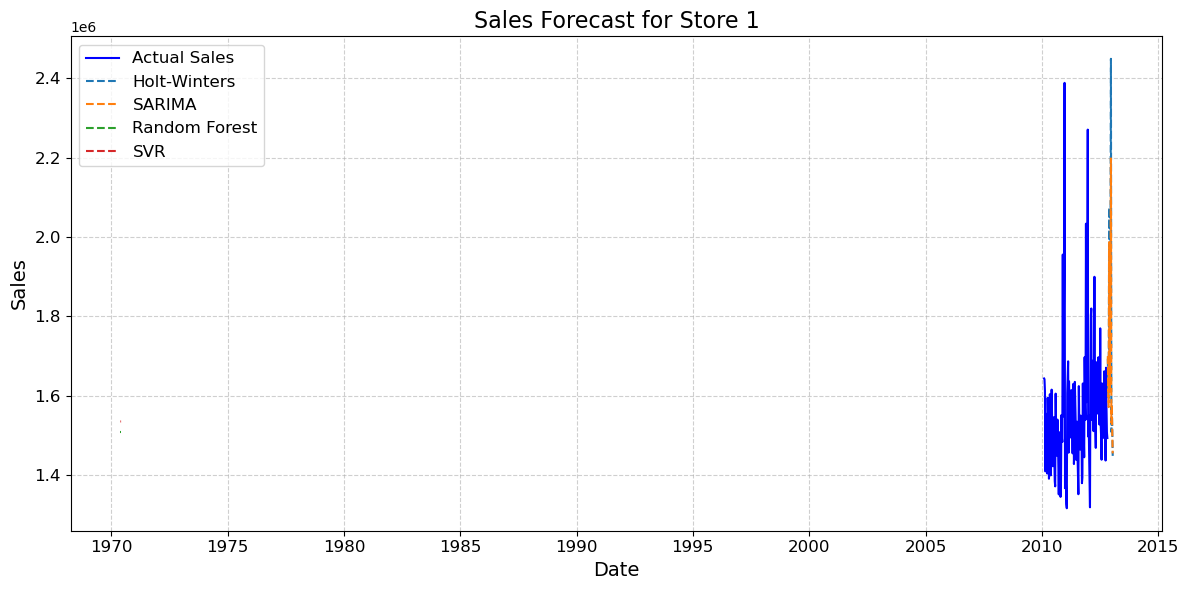

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

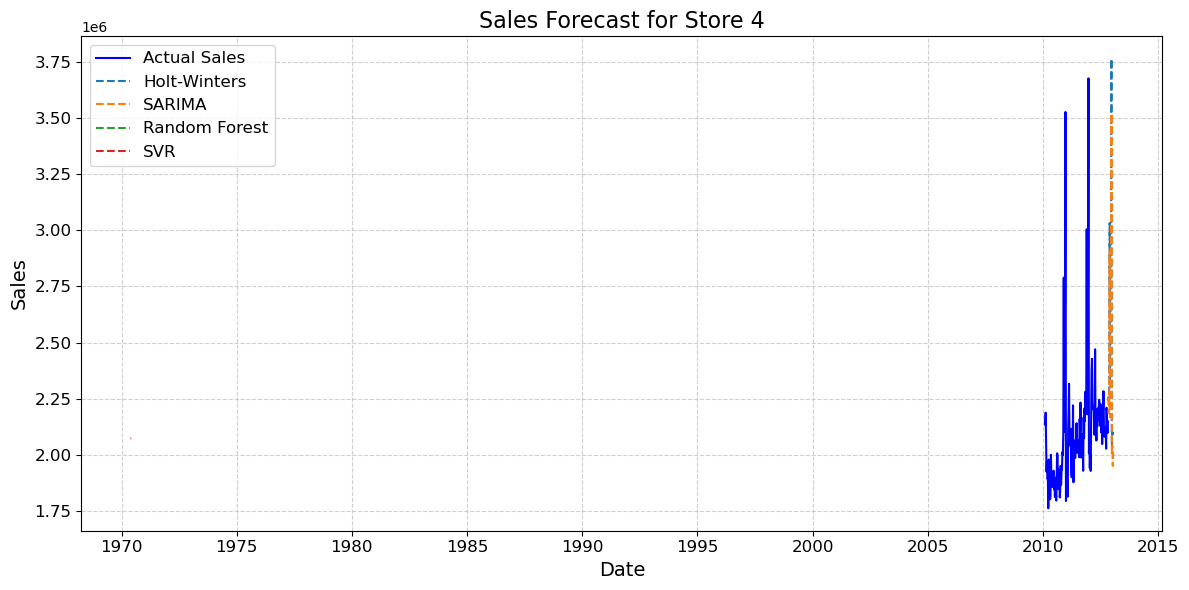

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

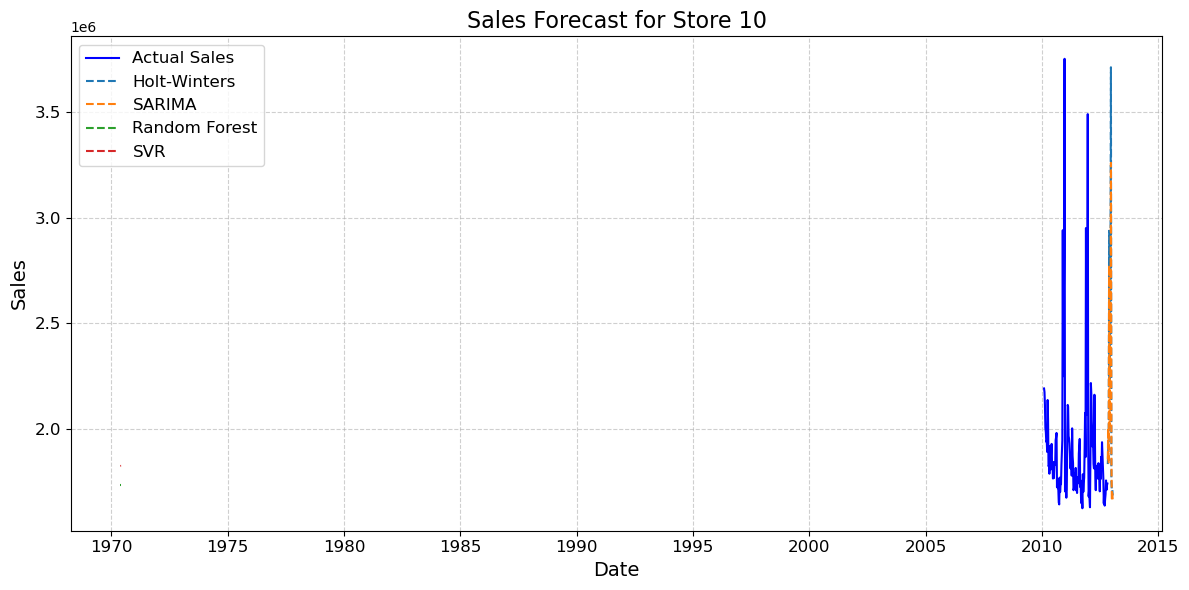

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

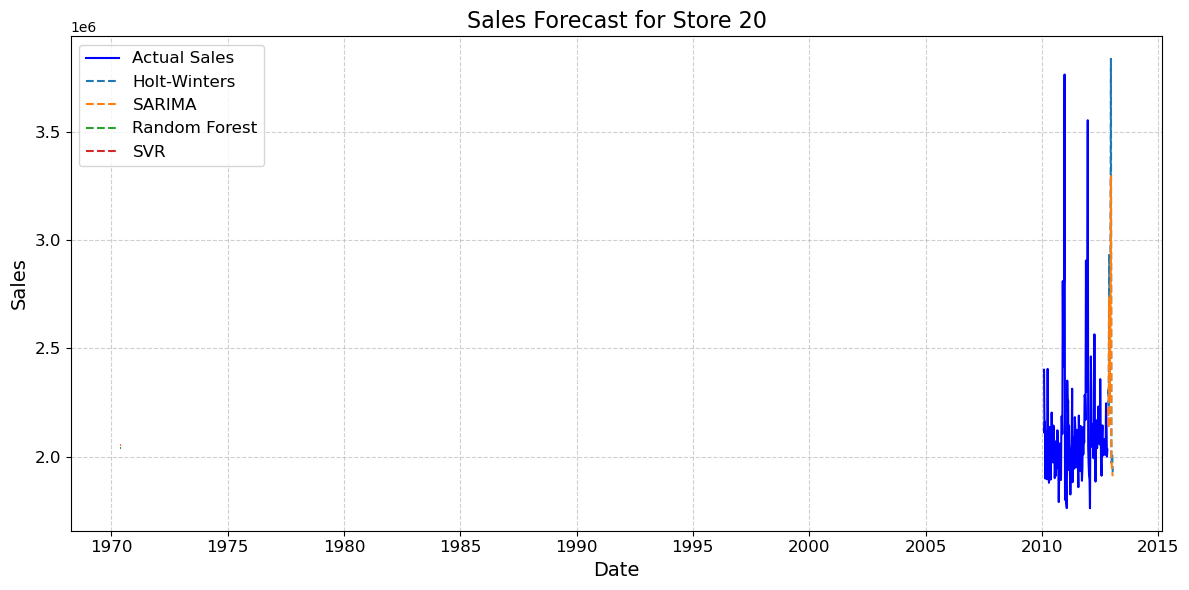

H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
H:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
H:\Anaconda\lib\site-packages\

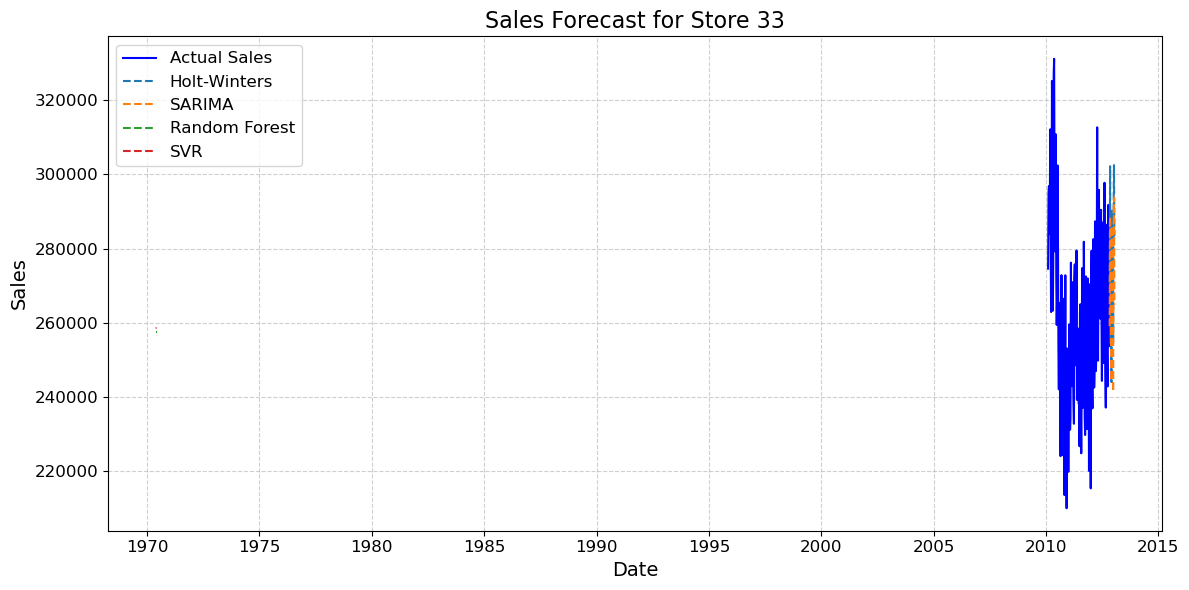

Forecast for Store 1:
Holt-Winters Forecast:
 2012-11-02    1.693358e+06
2012-11-09    1.620154e+06
2012-11-16    1.594745e+06
2012-11-23    2.073905e+06
2012-11-30    1.653565e+06
2012-12-07    1.814153e+06
2012-12-14    1.982550e+06
2012-12-21    2.448516e+06
2012-12-28    1.509116e+06
2013-01-04    1.577890e+06
2013-01-11    1.512378e+06
2013-01-18    1.448782e+06
Freq: W-FRI, dtype: float64
SARIMA Forecast:
 2012-11-02    1.699610e+06
2012-11-09    1.615761e+06
2012-11-16    1.571585e+06
2012-11-23    1.986658e+06
2012-11-30    1.610332e+06
2012-12-07    1.787374e+06
2012-12-14    1.863501e+06
2012-12-21    2.197790e+06
2012-12-28    1.531826e+06
2013-01-04    1.577991e+06
2013-01-11    1.504469e+06
2013-01-18    1.455033e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64
Random Forest Forecast:
 [1509848.1186 1509848.1186 1509848.1186 1509848.1186 1509848.1186
 1509848.1186 1509848.1186 1509848.1186 1509848.1186 1509848.1186
 1509848.1186 1509848.1186]
SVR Forecast:
 [1535104.0

In [12]:
for store in selected_stores:
    store_sales_data = df[df['Store'] == store].groupby("Date")["Weekly_Sales"].sum()
    
    # Holt-Winters Exponential Smoothing
    model_hw = ExponentialSmoothing(store_sales_data, trend="add", seasonal="add", seasonal_periods=52)
    fitted_hw = model_hw.fit()
    forecast_hw = fitted_hw.forecast(12)
    
    # SARIMA Model
    model_sarima = SARIMAX(store_sales_data, order=(1,1,1), seasonal_order=(1,1,1,52))
    fitted_sarima = model_sarima.fit()
    forecast_sarima = fitted_sarima.forecast(12)
    
    # Random Forest Regressor
    X = np.arange(len(store_sales_data)).reshape(-1, 1)
    y = store_sales_data.values
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    future_X = np.arange(len(store_sales_data), len(store_sales_data) + 12).reshape(-1, 1)
    forecast_rf = rf_model.predict(future_X)
    
    # Support Vector Regression (SVR)
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X, y)
    forecast_svr = svr_model.predict(future_X)
    
   
    
    forecast_results[store] = {
        "Holt-Winters": forecast_hw,
        "SARIMA": forecast_sarima,
        "Random Forest": forecast_rf,
        "SVR": forecast_svr,
        
    }
    
    # Plot Forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(store_sales_data, label="Actual Sales", color="blue")
    plt.plot(forecast_hw, label="Holt-Winters", linestyle="dashed")
    plt.plot(forecast_sarima, label="SARIMA", linestyle="dashed")
    plt.plot(range(len(store_sales_data), len(store_sales_data) + 12), forecast_rf, label="Random Forest", linestyle="dashed")
    plt.plot(range(len(store_sales_data), len(store_sales_data) + 12), forecast_svr, label="SVR", linestyle="dashed")
    #plt.plot(range(len(store_sales_data), len(store_sales_data) + 12), forecast_prophet, label="Prophet", linestyle="dashed")
    plt.title(f"Sales Forecast for Store {store}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc="upper left")
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Display forecast results
for store, methods in forecast_results.items():
    print(f"Forecast for Store {store}:")
    for method, forecast in methods.items():
        print(f"{method} Forecast:\n", forecast)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate the model
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 40)
    return mae, mse, rmse

# Example usage: Replace the placeholders below with actual values
# Assuming `actual_sales` is the array of actual sales values for a store
# Assuming `forecast_hw`, `forecast_sarima`, `forecast_rf`, and `forecast_svr` are the forecasted values

# Prepare actual values (for the evaluation period)
evaluation_period = 12  # Adjust based on forecast horizon
actual_sales = store_sales_data[-evaluation_period:]  # Last 12 weeks of actual sales

# Evaluate Holt-Winters
evaluate_model(actual_sales, forecast_hw, "Holt-Winters")

# Evaluate SARIMA
evaluate_model(actual_sales, forecast_sarima, "SARIMA")

# Evaluate Random Forest
evaluate_model(actual_sales, forecast_rf, "Random Forest Regressor")

# Evaluate SVR
evaluate_model(actual_sales, forecast_svr, "SVR")

# Optional: Store results in a dictionary for comparison
evaluation_results = {
    "Holt-Winters": evaluate_model(actual_sales, forecast_hw, "Holt-Winters"),
    "SARIMA": evaluate_model(actual_sales, forecast_sarima, "SARIMA"),
    "Random Forest": evaluate_model(actual_sales, forecast_rf, "Random Forest Regressor"),
    "SVR": evaluate_model(actual_sales, forecast_svr, "SVR"),
}

# Print the best performing model
best_model = min(evaluation_results, key=lambda x: evaluation_results[x][2])  # Based on RMSE
print(f"The best performing model is: {best_model}")


Holt-Winters Evaluation Metrics:
Mean Absolute Error (MAE): 27209.99
Mean Squared Error (MSE): 924555246.63
Root Mean Squared Error (RMSE): 30406.50
----------------------------------------
SARIMA Evaluation Metrics:
Mean Absolute Error (MAE): 25524.82
Mean Squared Error (MSE): 788469794.19
Root Mean Squared Error (RMSE): 28079.70
----------------------------------------
Random Forest Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 16704.56
Mean Squared Error (MSE): 418247572.07
Root Mean Squared Error (RMSE): 20451.10
----------------------------------------
SVR Evaluation Metrics:
Mean Absolute Error (MAE): 16715.03
Mean Squared Error (MSE): 405559490.74
Root Mean Squared Error (RMSE): 20138.51
----------------------------------------
Holt-Winters Evaluation Metrics:
Mean Absolute Error (MAE): 27209.99
Mean Squared Error (MSE): 924555246.63
Root Mean Squared Error (RMSE): 30406.50
----------------------------------------
SARIMA Evaluation Metrics:
Mean Absolute Error (MAE): 